<div id="titre">
<h1 style="color:white;
  font-family:Comic Sans MS;
  font-size:3em;
  background-color:#F0573B;
  text-align:center;
  padding:10px">Prêt pour la meilleure photo ? </h1>
<div style="font-family:Comic Sans MS; background-color:black;box-shadow: 8px 8px 0px #aaa; text-align:center; width: 50%; color:white">TP  - Statitique</div>
</div>

Un animal a été représenté à l'aide d'un logiciel de CAO (conception assistée par ordinateur).
<br> Chaque point point du nuage a été représenté dans un repère orthonormé $\left(O\,;\,\overrightarrow{i}\,,\,\overrightarrow{j}\,,\,\overrightarrow{k}\right)$ à l'aide de ses coordonnées.
<br>Plus précisément le point $M_i$ a pour coordonnées dans ce repère $x_i$, $y_i$ et $z_i$.
<br> Le fichier <code>'animal.csv'</code> contient :
<ul>
    <li>l'abscisse</li>
    <li>l'ordonnée</li>
    <li>la côte</li>
</ul>
de chaque point du nuage représenté en 3D par ce logiciel.
<br><b><u>Objectifs</u></b>
<blockquote style="border-left: 10px solid black;background-color:#F0573B">
    <ul>
        <li>Ouvrir ce jeu de données avec <b>pandas</b>.</li>
        <li>Trouver le meilleur plan $\mathscr{P}$ sur lequel on pourra projeter le nuage de points pour obtenir sa représentation en 2D la plus "éclatée".
            <br><span style='color:red;background-color:orange'><b>Ce plan constituera le meilleur profil de l'animal et celui où on le reconnaîtra le plus facilement.</b></span>
        </li>
    </ul>
</blockquote>

<h1 style="color:white;background-color:black;text-align:center"> Partie A : ouverture avec Pandas</h1>

<span style='color:white;font-weight:bold;background-color:black;width:12px;padding: 2px;font-size:20px'>1.</span> Traitement du jeu de données: 
<br>Exécuter les cellules ci-dessous pour ouvrir le jeu de données avec <b>pandas</b> : 

In [1]:
import pandas as pa
import pylab as pl

In [2]:
T = pa.read_csv('animal.csv')
T.head()

,x,y,z
0,-1.355748,7.429886,-4.717012
1,-1.441411,7.520890,-5.363282
2,-1.797154,8.391556,-5.254670
3,-1.752721,8.303772,-4.593583
4,-1.360402,7.627831,-5.976777


<span style='color:white;font-weight:bold;background-color:black;width:12px;padding: 2px;font-size:20px'>2.</span> Une projection du nuage de points

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>a.</span> On représente la colonne <code>'y'</code> en fonction de la colonne <code>'x'</code>. Exécuter le code ci-dessous : 

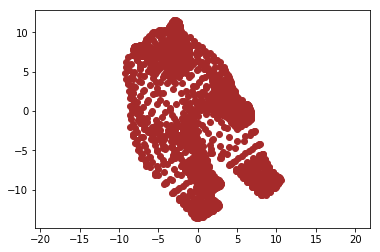

In [3]:
pl.axis('equal')
pl.scatter(T['x'],T['y'],marker='o',color='brown')

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>b.</span> Sur quel plan a-t-on projeté le nuage ? <i>(on donnera 2 vecteurs directeurs de ce plan)</i>. 

<h1 style="color:white;background-color:black;text-align:center"> Partie B : projection du nuage sur une droite</h1>

<b><u>On note</u></b>
<blockquote style="border-left: 10px solid black;background-color:#F0573B">
          <ul>
                <li>$\overrightarrow{U}$ le vecteur de l'espace de coordonnées $\begin{pmatrix}a\\
b\\
c
\end{pmatrix}$ </li>
                <li>$\overrightarrow{u} = \dfrac{\overrightarrow{U}}{\left\Vert \overrightarrow{U}\right\Vert }$ le vecteur colinéaire à $\overrightarrow{U}$ de norme 1</li>
        <br>
        <li>$\mathscr{D}$ la droite dirigée par $\overrightarrow{u}$ et passant par $O$.
        </li>
    </ul>
</blockquote>

<b><u>Projection orthogonale du nuage sur $\mathscr{D}$</u></b>
<blockquote style="border-left: 10px solid black;background-color:#F0573B">
Soit $P_i$ le projeté orthogonal de $M_i$ sur $\mathscr{D}$.
    <br> <ul>
    <li>Par construction, on a $$\overrightarrow{OP_i}=p_i\overrightarrow{u}$$ avec $p_i\in \mathbb{R}$.</li>
    <li>Ainsi le point $P_i$ est repéré sur $\mathscr{D}$ par son abscisse $p_i$.</li>
    </ul>
    <img src=figure1.png width='300'>
</blockquote>

<span style='color:white;font-weight:bold;background-color:black;width:12px;padding: 2px;font-size:20px'>1.</span> Calcul de $p_i$

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>a.</span> Calculer $<\overrightarrow{OM_i}\,,\,\overrightarrow{u}>$ de 2 façons différentes.

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>b.</span> En déduire que : $$p_i=\dfrac{ax_i+by_i+cz_i}{\left\Vert \overrightarrow{U}\right\Vert}$$

<span style='color:white;font-weight:bold;background-color:black;width:12px;padding: 2px;font-size:20px'>2.</span> Compléter la fonction nommée <code>variance</code> de paramètres <code>a</code>, <code>b</code> et <code>c</code>.
<br> Elle renvoie la variance de la série statistique $(p_i)$ :

In [4]:
def variance(a,b,c):
    V = a*T['x']+b*T['y']+c*T['z']
    norm = (a**2+b**2+c**2)**0.5
    V = V/norm
    return V.var()

<b><u>Objectif</u></b>
<blockquote style="border-left: 10px solid black;background-color:#F0573B">
On cherche à déterminer le vecteur $\overrightarrow{u_0}$ de :
    <ul>
        <li>norme 1</li>
        <li>coordonnées $\begin{pmatrix}a_0\\
b_0\\
c_0
\end{pmatrix}$</li>
    </ul>
        qui rend maximise la variance de la série statistique des $(p_i)$.
    <br>
<br> Ainsi la droite $\mathscr{D}_0$ engendrée par $\overrightarrow{u_0}$ maximisera la dispersion du nuage projeté.
</blockquote>

<h1 style="color:white;background-color:black;text-align:center"> Partie C : recherche de $\mathscr{D_0}$ par simulations aléatoires</h1>

<span style='color:white;font-weight:bold;background-color:black;width:12px;padding: 2px;font-size:20px'>1.</span> On importe la fonction <code>uniform</code> du module random. 

In [5]:
from random import uniform

<span style='background-color:lightgreen;padding:10px'><b>Avec python :</b> <code>uniform(a,b)</code> renvoie un nombre aléatoirement choisi entre <code>a</code> et <code>b</code>. </span>

<span style='color:white;font-weight:bold;background-color:black;width:12px;padding: 2px;font-size:20px'>2.</span> Recherche de $a_0$, $b_0$ et $c_0$ par simulations aléatoires 

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>a.</span> La fonction <code>tirage1</code> a pour paramètre <code>n</code> <i>(un nombre entier non nul)</i>.
<br> Elle génère <code>n</code> fois de suite :
<ul>
    <li>3 nombres <code>a</code>, <code>b</code> et <code>c</code> choisis aléatoirement dans $[-1\,;\,1]$</li>
    <li>calcule : 
        <ul>
            <li>la norme <code>norm</code> du vecteur $\begin{pmatrix}a\\
b\\
c
\end{pmatrix}$ </li>
                <li>la variance <code>v</code> de la série statistique $(p_i)$</li>
        </ul>
</ul>
Elle renvoie les valeurs de <code>a</code>, <code>b</code> et <code>c</code> qui rendent la variance maximale.
<br>
<br> Compléter les intructions en pointillés puis exécuter la cellule :

In [6]:
def tirage1(n):
    m = 0
    for k in range(n):
        a = uniform(-1,1)
        b = uniform(-1,1)
        c = uniform(-1,1)
        norm = (a**2+b**2+c**2)**0.5
        v = variance(a,b,c)
        if v > m:
            m = v
            a0, b0, c0 = a/norm, b/norm ,c/norm
    return a0, b0, c0, m

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>b.</span> Exécuter la fonction <code>tirage1</code> pour <code>n</code>$=10000$

In [7]:
a0, b0, c0, m = tirage1(10000)
a0, b0, c0, m

(0.1805936422233815,
 -0.509247720929398,
 0.8414586710687029,
 144.74330796253167)

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>c.</span> Après ces simulations, lire les coordonnées obtenues du vecteur $\overrightarrow{u_0}$.

<h1 style="color:white;background-color:black;text-align:center"> Partie D : projection du nuage sur une droite orthogonale à $\mathscr{D}_0$ </h1>

Soient :
<ul>
    <li>$\mathscr{D}$ une droite orthogonale à $\mathscr{D}_0$ passant par l'origine du repère.</li>
    <li>$\overrightarrow{u}$ un vecteur directeur de $\mathscr{D}$ de norme $1$.</li>
</ul>

<b><u>Projection orthogonale du nuage sur $\mathscr{D}$</u></b>
<blockquote style="border-left: 10px solid black;background-color:#F0573B">
Soit $Q_i$ le projeté orthogonal de $M_i$ sur $\mathscr{D}$.
    <br> <ul>
    <li>Par construction, on a $$\overrightarrow{OQ_i}=q_i\overrightarrow{u}$$ avec $q_i\in \mathbb{R}$.</li>
    <li>Ainsi le point $Q_i$ est repéré sur $\mathscr{D}$ par son abscisse $q_i$.</li>
    </ul>
    <img src=figure2.png width='300'>
</blockquote>

<b><u>Objectif</u></b>
<blockquote style="border-left: 10px solid black;background-color:#F0573B">
On cherche à déterminer le vecteur $\overrightarrow{u_1}$ :
    <ul>
        <li>de norme 1</li>
        <li>de coordonnées $\begin{pmatrix}a_1\\
b_1\\
c_1
\end{pmatrix}$</li>
        <li>orthogonal à $\overrightarrow{u_0}$</li>
        <li>et telle que la variance de la série $(q_i)$ soit maximale </li>
    </ul>
</blockquote>

<span style='color:white;font-weight:bold;background-color:black;width:12px;padding: 2px;font-size:20px'>1.</span> Justifier que $$c_1=-\dfrac{a_0a_1+b_0b_1}{c_0}$$

<span style='color:white;font-weight:bold;background-color:black;width:12px;padding: 2px;font-size:20px'>2.</span> Recherche de $a_1$, $b_1$ et $c_1$ par simulations aléatoires 

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>a.</span> La fonction <code>tirage2</code> a pour paramètre <code>n</code> <i>(un nombre entier non nul)</i>.
<br> Elle génère <code>n</code> fois de suite :
<ul>
    <li>2 nombres <code>a</code>, <code>b</code> choisis aléatoirement dans $[-1\,;\,1]$</li>
    <li>calcule : 
        <ul>
            <li>la valeur de <code>c</code> de sorte que le vecteur $\begin{pmatrix}a\\
b\\
c
\end{pmatrix}$ soit orthogonal à $\overrightarrow{u_0}$ </li>
            <li>la norme <code>norm</code> du vecteur $\begin{pmatrix}a\\
b\\
c
\end{pmatrix}$ </li>
                <li>la variance <code>v</code> de la série statistique $(q_i)$</li>
        </ul>
</ul>
Elle renvoie les valeurs de <code>a</code>, <code>b</code> et <code>c</code> qui rendent la variance maximale.
<br>
<br> Compléter les intructions en pointillés puis exécuter la cellule :

In [8]:
def tirage2(n):
    m = 0
    for k in range(n):
        a = uniform(-1,1)
        b = uniform(-1,1)
        c = -(a0*a+b0*b)/c0
        norm = (a**2+b**2+c**2)**0.5
        v = variance(a,b,c)
        if v > m:
            m = v
            a1, b1, c1 = a/norm, b/norm ,c/norm
    return a1, b1, c1, m

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>b.</span> Exécuter la fonction <code>tirage2</code> pour <code>n</code>$=10000$

In [9]:
a1, b1, c1, m = tirage2(10000)
a1, b1, c1, m

(-0.5967141054370724,
 0.623362388103429,
 0.5053232722430508,
 24.588795802477033)

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>c.</span> Après ces simulations, lire les coordonnées obtenues du vecteur $\overrightarrow{u_1}$.

<h1 style="color:white;background-color:black;text-align:center"> Partie E : projection du nuage sur le plan $\mathscr{P}$ </h1>

<b><u>Objectif</u></b>
<blockquote style="border-left: 10px solid black;background-color:#F0573B">
    <ul>
        <li>On note $\mathscr{P}$ le plan contenant $\mathscr{D}_0$ et $\mathscr{D}_1$.
        </li>
        <li>On note $H_i$ le projeté orthogonal de $M_i$ sur $\mathscr{P}$.
    <br> <ul>
    <li>Par construction, on a $$\overrightarrow{OH_i}=X_i\overrightarrow{u_0}+Y_i\overrightarrow{u_1}$$ avec $X_i\in \mathbb{R}$ et $Y_i\in \mathbb{R}$.</li>
            <img src=figure3.png width='350'>
    <li>Ainsi le point $H_i$ est repéré sur $\mathscr{P}$ par son abscisse $X_i$ et son ordonnée $Y_i$.</li>
    </ul>
    </ul>
</blockquote>

<span style='color:white;font-weight:bold;background-color:black;width:12px;padding: 2px;font-size:20px'>1.</span> Coordonnée $X_i$ 

<div style='background-color:#F5B7B1;padding:10px'><b>Rappels :</b> 
    <ul>
        <li>$\overrightarrow{OP_i}=p_i\overrightarrow{u}_0$</li>
        <li>$\overrightarrow{OM_i}=\overrightarrow{OP_i}+\overrightarrow{P_iM_i}$
    </ul>
</div>

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>a.</span> Calculer $<\overrightarrow{OM_i}\,,\,\overrightarrow{u_0}>$ de 2 façons différentes.

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>b.</span> En déduire que $X_i=p_i$.

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>c.</span> Pour ajouter à la table <code>T</code> la colonne nommée <code>'Xi'</code>contenant les nombres $X_i$ exécuter :

In [10]:
T['Xi'] = a0*T['x']+b0*T['y']+c0*T['z']
T.head()

,x,y,z,Xi
0,-1.355748,7.429886,-4.717012,-7.997662
1,-1.441411,7.520890,-5.363282,-8.603286
2,-1.797154,8.391556,-5.254670,-9.019523
3,-1.752721,8.303772,-4.593583,-8.410517
4,-1.360402,7.627831,-5.976777,-9.159346


<span style='color:white;font-weight:bold;background-color:black;width:12px;padding: 2px;font-size:20px'>2.</span> Coordonnées $Y_i$ 

<div style='background-color:#F5B7B1;padding:10px'><b>Rappels :</b> 
    <ul>
        <li>$\overrightarrow{OQ_i}=q_i\overrightarrow{u}_1$</li>
        <li>$\overrightarrow{OM_i}=\overrightarrow{OQ_i}+\overrightarrow{Q_iM_i}$
    </ul>
</div>

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>a.</span> Calculer $<\overrightarrow{OM_i}\,,\,\overrightarrow{u_1}>$ de 2 façons différentes.

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>b.</span> En déduire que $Y_i=q_i$.

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>c.</span> Ajouter à la table <code>T</code> la colonne nommée <code>'Yi'</code> contenant les nombres $Y_i$ :

In [11]:
T['Yi'] = a1*T['x']+b1*T['y']+c1*T['z']
T.head()

,x,y,z,Xi,Yi
0,-1.355748,7.429886,-4.717012,-7.997662,3.056890
1,-1.441411,7.520890,-5.363282,-8.603286,2.838159
2,-1.797154,8.391556,-5.254670,-9.019523,3.648061
3,-1.752721,8.303772,-4.593583,-8.410517,3.900888
4,-1.360402,7.627831,-5.976777,-9.159346,2.546470


<span style='color:white;font-weight:bold;background-color:black;width:12px;padding: 2px;font-size:20px'>3.</span> Meilleure orientation de l'animal 

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>a.</span> Représenter le nuage projeté sur $\mathscr{P}$

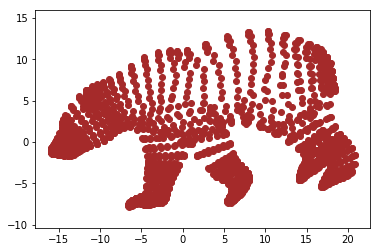

In [12]:
pl.axis('equal')
pl.scatter(T['Xi'],T['Yi'],marker='o',color='brown')

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>b.</span> Représenter le nuage projeté sur $\mathscr{P}$ avec une meilleure orientation de l'animal (si celui-ci ne pointe pas le bout de son nez de la gauche vers la droite...)

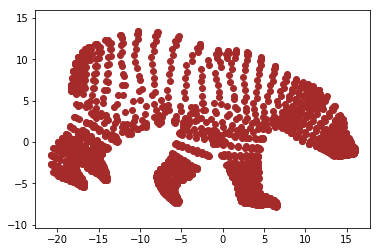

In [13]:
pl.axis('equal')
pl.scatter(-T['Xi'],T['Yi'],marker='o',color='brown')

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>c.</span> Quel est cet animal ? 

<h1 style="color:white;background-color:black;text-align:center"> Bonus : projection du nuage sur le plan $\mathscr{P}$ dans l'espace</h1>

<div style='background-color:#F5B7B1;padding:10px'><b>Rappels :</b> 
    <ul>
        <li>$\overrightarrow{OH_i}=X_i\overrightarrow{u}_0+Y_i\overrightarrow{u}_1$</li>
        <li>$\overrightarrow{u_0} \ \begin{pmatrix}a_0\\
b_0\\
c_0
\end{pmatrix}$ et $\overrightarrow{u_1} \ \begin{pmatrix}a_1\\
b_1\\
c_1
\end{pmatrix}$
    </ul>
</div>

<span style='color:white;font-weight:bold;background-color:black;width:12px;padding: 2px;font-size:20px'>1.</span> Coordonnées de $H_i$ dans le repère $\left(O\,;\,\overrightarrow{i}\,,\,\overrightarrow{j}\,,\,\overrightarrow{k}\right)$ 

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>a.</span> Justifier que $H_i$ a pour coordonnées $\begin{pmatrix}a_0X_i+a_1Y_i\\
b_0X_i+b_1Y_i\\
c_0X_i+c_1Y_i
\end{pmatrix}$ dans ce repère.

<span style='color:white;font-weight:bold;background-color:#F0573B;padding: 2px;font-size:20px'>b.</span> Ajouter l'abscisse de chaque point $H_i$ dans une nouvelle colonne de <code>T</code> nommée <code>'x_Hi'</code>.
<br> Faire de même pour les ordonnées et les côtes dans les colonnes nommées respectivement <code>'y_Hi'</code> et <code>'z_Hi'</code>.

In [14]:
T['x_Hi'] = a0*T['Xi']+a1*T['Yi']
T['y_Hi'] = b0*T['Xi']+b1*T['Yi']
T['z_Hi'] = c0*T['Xi']+c1*T['Yi']

<span style='color:white;font-weight:bold;background-color:black;width:12px;padding: 2px;font-size:20px'>2.</span> Représentation dans l'espace du <span style='color:silver'><b>nuage projeté</b></span> sur $\mathscr{P}$ avec <span style='color:red'> $\overrightarrow{u_0}$</span> et <span style='color:blue'>$\overrightarrow{u_1}$</span>

In [15]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


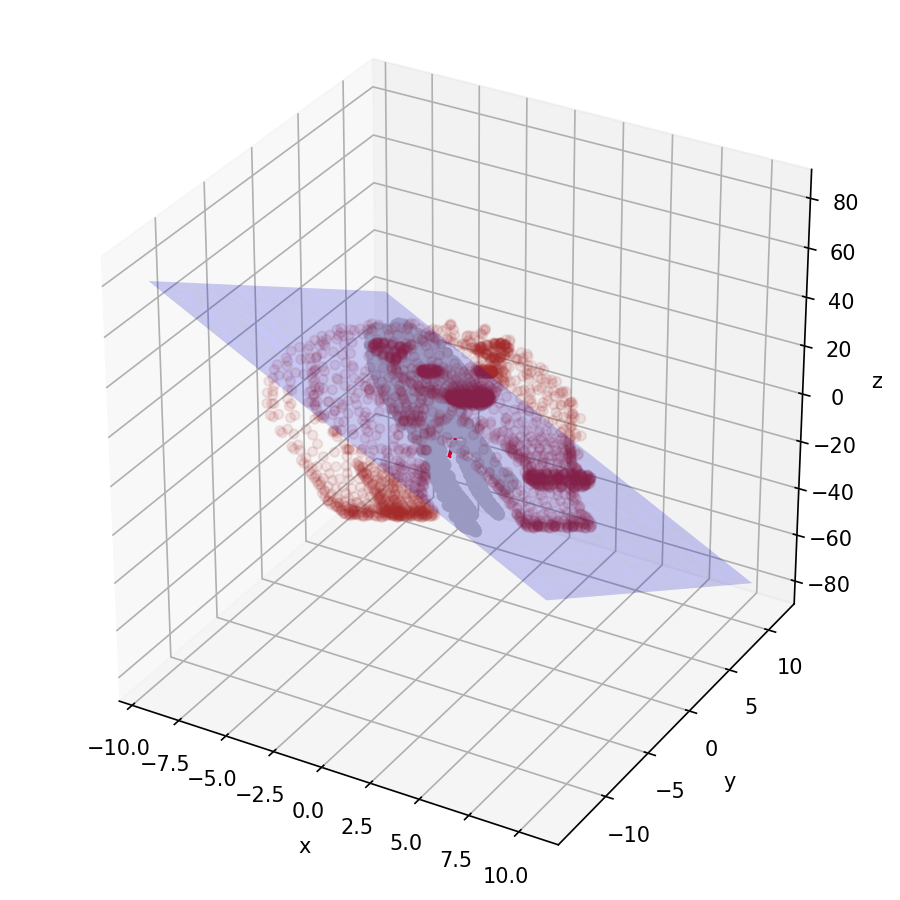

Text(0.5, 0, 'z')

In [16]:
%matplotlib notebook
fig = pl.figure(figsize=(6,6))
ax = Axes3D(fig)
#ax.set_aspect('equal')
ax.scatter(T['x_Hi'], T['y_Hi'], T['z_Hi'],marker='o',alpha=0.8,color='silver')

ax.quiver(0,0,0,a0,b0,c0,color='red',length=10)
ax.quiver(0,0,0,a1,b1,c1,color='blue',length=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

- Instruction permettant de dessiner en plus le plan <span style='color:blue'>$\boldsymbol{\mathscr{P}}$</span> :

In [17]:
import numpy as np

xx, yy = np.meshgrid(np.arange(T.x.min(),T.x.max(),0.1),np.arange(T.y.min(),T.y.max(),0.1))
n0 = b0*c1 - c0*b1
n1 = c0*a1 - a0*c1
n2 = a0*b1 - b0*a1
z = -(n0*xx + n1*yy)*1/n2

ax.plot_surface(xx, yy, z, alpha=0.2,color='blue')

- Instruction permettant d'ajouter en plus du <span style='color:brown'><b>nuage de l'animal</b></span> :

In [18]:
ax.scatter(T['x'], T['y'], T['z'],marker='o',alpha=0.1,color='brown')

<h1 style="color:white;background-color:black;text-align:center"> Coin Prof ! Algèbre linéaire et diagonalisation</h1>

In [19]:
T = pa.read_csv('animal.csv')

In [20]:
C = T.cov()
C

,x,y,z
x,19.882711,-17.504755,15.724125
y,-17.504755,52.142607,-53.773264
z,15.724125,-53.773264,108.027302


In [21]:
from numpy import *
from numpy.linalg import *

L = []
for i in T.columns:
    L.append([C.loc[i,j] for j in T.columns])
M = matrix(C)
M

matrix([[ 19.88271066, -17.50475487,  15.72412516],
        [-17.50475487,  52.14260662, -53.77326426],
        [ 15.72412516, -53.77326426, 108.02730168]])

In [22]:
eig(M)

(array([144.76025618,  10.70999655,  24.58236623]),
 matrix([[-0.17802277,  0.78315414, -0.59579987],
         [ 0.51902992,  0.58912928,  0.61930173],
         [-0.83601186,  0.19898815,  0.51135886]]))

In [23]:
(eig(M)[0][0]+eig(M)[0][2])/trace(M)

0.9405174075935436

In [24]:
V0 = eig(M)[1][:,0]
V1 = eig(M)[1][:,2]

In [25]:
Z = matrix(T)

T['x_proj'] = Z*V0
T['y_proj'] = Z*V1
T.head()

,x,y,z,x_proj,y_proj
0,-1.355748,7.429886,-4.717012,8.041165,2.997010
1,-1.441411,7.520890,-5.363282,8.643938,2.773931
2,-1.797154,8.391556,-5.254670,9.068369,3.580627
3,-1.752721,8.303772,-4.593583,8.462220,3.837842
4,-1.360402,7.627831,-5.976777,9.197911,2.478179


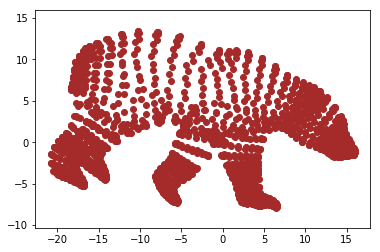

In [26]:
%matplotlib inline
pl.axis('equal')
pl.scatter(T['x_proj'],T['y_proj'],marker='o',color='brown')